<a href="https://colab.research.google.com/github/himalayahall/DATA608/blob/main/Story%201/Story1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [59]:
#!jupyter nbconvert --to pdf Story1.ipynb
#!pip install matplotlib
#!pip install numpy

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
funding_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/IIJA%20FUNDING%20AS%20OF%20MARCH%202023.csv")
funding_ds.head(n=10)

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000
5,CALIFORNIA,18.4000
6,COLORADO,3.2000
7,CONNECTICUT,2.5000
8,DELEWARE,0.7920
9,DISTRICT OF COLUMBIA,1.1000


In [62]:
funding_ds.dtypes

State, Teritory or Tribal Nation     object
Total (Billions)                    float64
dtype: object

In [63]:
funding_ds.rename(columns={"State, Teritory or Tribal Nation": "STATE", "Total (Billions)": "FUNDING"}, inplace=True)
funding_ds = funding_ds.astype({'STATE' : 'string'})
funding_ds.dtypes

STATE      string[python]
FUNDING           float64
dtype: object

In [64]:
funding_ds = funding_ds[funding_ds['STATE'] != 'AMERICAN SAMOA']
funding_ds = funding_ds.reset_index(drop=True)
funding_ds.head(n=10)

,STATE,FUNDING
0,ALABAMA,3.000
1,ALASKA,3.700
2,ARIZONA,3.500
3,ARKANSAS,2.800
4,CALIFORNIA,18.400
5,COLORADO,3.200
6,CONNECTICUT,2.500
7,DELEWARE,0.792
8,DISTRICT OF COLUMBIA,1.100
9,FLORIDA,8.200


In [65]:
election2020_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/2020_Presidential_Elections.csv", skip_blank_lines=True)
election2020_ds.head(n = 5)

,STATE,BIDEN,TRUMP
0,NaN,(D),(R)
1,Alabama,36.57%,62.03%
2,Alaska,42.77%,52.83%
3,Arizona,49.36%,49.06%
4,Arkansas,34.78%,62.40%


In [66]:
election2020_ds = election2020_ds.drop([0])
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
1,Alabama,36.57%,62.03%
2,Alaska,42.77%,52.83%
3,Arizona,49.36%,49.06%
4,Arkansas,34.78%,62.40%
5,California,63.48%,34.32%
6,Colorado,55.40%,41.90%
7,Connecticut,59.26%,39.19%
8,Delaware,58.74%,39.77%
9,D.C.,92.15%,5.40%
10,Florida,47.86%,51.22%


In [67]:
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
47,Virginia,54.11%,44.00%
48,Washington,57.97%,38.77%
49,West Virginia,29.69%,68.62%
50,Wisconsin,49.45%,48.82%
51,Wyoming,26.55%,69.94%
52,Total Percentage of Popular Vote:,NaN,NaN
53,NaN,51.31%,46.85%
54,NaN,NaN,NaN
55,NaN,NaN,NaN
56,Note: The winning candidate percentage in eac...,NaN,NaN


In [68]:
election2020_ds = election2020_ds.drop([i for i in range(51, 56)])
election2020_ds = election2020_ds.reset_index(drop=True)
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
41,South Dakota,35.61%,61.77%
42,Tennessee,37.45%,60.66%
43,Texas,46.48%,52.06%
44,Utah,37.65%,58.13%
45,Vermont,66.09%,30.67%
46,Virginia,54.11%,44.00%
47,Washington,57.97%,38.77%
48,West Virginia,29.69%,68.62%
49,Wisconsin,49.45%,48.82%
50,Note: The winning candidate percentage in eac...,NaN,NaN


In [69]:
election2020_ds['BIDEN'] = election2020_ds['BIDEN'].str.replace('%', '', regex=False)
election2020_ds['TRUMP'] = election2020_ds['TRUMP'].str.replace('%', '', regex=False)
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
0,Alabama,36.57,62.03
1,Alaska,42.77,52.83
2,Arizona,49.36,49.06
3,Arkansas,34.78,62.40
4,California,63.48,34.32
5,Colorado,55.40,41.90
6,Connecticut,59.26,39.19
7,Delaware,58.74,39.77
8,D.C.,92.15,5.40
9,Florida,47.86,51.22


In [70]:
election2020_ds['STATE'] = election2020_ds['STATE'].str.upper()
election2020_ds['STATE'] = election2020_ds['STATE'].str.replace('D.C.', 'DISTRICT OF COLUMBIA', regex=False)
election2020_ds.head(n=10)


,STATE,BIDEN,TRUMP
0,ALABAMA,36.57,62.03
1,ALASKA,42.77,52.83
2,ARIZONA,49.36,49.06
3,ARKANSAS,34.78,62.40
4,CALIFORNIA,63.48,34.32
5,COLORADO,55.40,41.90
6,CONNECTICUT,59.26,39.19
7,DELAWARE,58.74,39.77
8,DISTRICT OF COLUMBIA,92.15,5.40
9,FLORIDA,47.86,51.22


In [71]:
election2020_ds = election2020_ds.astype({'STATE': 'string', 'BIDEN': 'float', 'TRUMP' : 'float'})
election2020_ds.dtypes

STATE    string[python]
BIDEN           float64
TRUMP           float64
dtype: object

In [72]:
election2020_ds['BIDEN_WON'] = election2020_ds.apply(lambda row: 'YES' if row.BIDEN > row.TRUMP else 'NO', axis=1)
election2020_ds = election2020_ds.astype({'BIDEN_WON' : 'string'})

election2020_ds['COLOR'] = election2020_ds.apply(lambda row: 'blue' if row.BIDEN_WON == 'YES' else 'red', axis=1)
election2020_ds = election2020_ds.astype({'COLOR' : 'string'})
election2020_ds.head(10)

,STATE,BIDEN,TRUMP,BIDEN_WON,COLOR
0,ALABAMA,36.57,62.03,NO,red
1,ALASKA,42.77,52.83,NO,red
2,ARIZONA,49.36,49.06,YES,blue
3,ARKANSAS,34.78,62.40,NO,red
4,CALIFORNIA,63.48,34.32,YES,blue
5,COLORADO,55.40,41.90,YES,blue
6,CONNECTICUT,59.26,39.19,YES,blue
7,DELAWARE,58.74,39.77,YES,blue
8,DISTRICT OF COLUMBIA,92.15,5.40,YES,blue
9,FLORIDA,47.86,51.22,NO,red


In [73]:
population_ds = pd.read_csv("https://raw.githubusercontent.com/himalayahall/DATA608/main/Story%201/NST_EST2022_POP.csv", skip_blank_lines=True)
population_ds.head(n=10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN
2,NaN,NaN,2020,2021,2022
3,United States,"331,449,520","331,511,512","332,031,554","333,287,557"
4,Northeast,"57,609,156","57,448,898","57,259,257","57,040,406"
5,Midwest,"68,985,537","68,961,043","68,836,505","68,787,595"
6,South,"126,266,262","126,450,613","127,346,029","128,716,192"
7,West,"78,588,565","78,650,958","78,589,763","78,743,364"
8,.Alabama,"5,024,356","5,031,362","5,049,846","5,074,296"
9,.Alaska,"733,378","732,923","734,182","733,583"


In [74]:
population_ds = population_ds.drop([i for i in range(0, 8)])
population_ds = population_ds.reset_index(drop=True)
population_ds.head(n=10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,.Alabama,"5,024,356","5,031,362","5,049,846","5,074,296"
1,.Alaska,"733,378","732,923","734,182","733,583"
2,.Arizona,"7,151,507","7,179,943","7,264,877","7,359,197"
3,.Arkansas,"3,011,555","3,014,195","3,028,122","3,045,637"
4,.California,"39,538,245","39,501,653","39,142,991","39,029,342"
5,.Colorado,"5,773,733","5,784,865","5,811,297","5,839,926"
6,.Connecticut,"3,605,942","3,597,362","3,623,355","3,626,205"
7,.Delaware,"989,957","992,114","1,004,807","1,018,396"
8,.District of Columbia,"689,546","670,868","668,791","671,803"
9,.Florida,"21,538,226","21,589,602","21,828,069","22,244,823"


In [75]:
population_ds = population_ds.drop(columns = [col for col in population_ds.columns if col in ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']])
population_ds.columns = ["STATE", "POPULATION"]
population_ds.tail(n=10)

,STATE,POPULATION
48,.West Virginia,"1,775,156"
49,.Wisconsin,"5,892,539"
50,.Wyoming,"581,381"
51,NaN,NaN
52,.Puerto Rico,"3,221,789"
53,Note: The estimates are developed from a base ...,NaN
54,Suggested Citation:,NaN
55,Annual Estimates of the Resident Population fo...,NaN
56,"Source: U.S. Census Bureau, Population Division",NaN
57,Release Date: December 2022,NaN


In [76]:
population_ds = population_ds.drop([i for i in range(51, 58)])

population_ds['STATE'] = population_ds['STATE'].str.replace('.', '', regex=False)
population_ds['STATE'] = population_ds['STATE'].str.upper()
population_ds = population_ds.astype({'STATE' : 'string'})

population_ds['POPULATION'] = population_ds['POPULATION'].str.replace(',', '', regex=False)
population_ds = population_ds.astype({'POPULATION' : 'int'})

population_ds = population_ds.reset_index(drop=True)
population_ds.tail(n=10)

,STATE,POPULATION
41,SOUTH DAKOTA,909824
42,TENNESSEE,7051339
43,TEXAS,30029572
44,UTAH,3380800
45,VERMONT,647064
46,VIRGINIA,8683619
47,WASHINGTON,7785786
48,WEST VIRGINIA,1775156
49,WISCONSIN,5892539
50,WYOMING,581381


In [77]:
population_ds.dtypes

STATE         string[python]
POPULATION             int64
dtype: object

<BarContainer object of 51 artists>

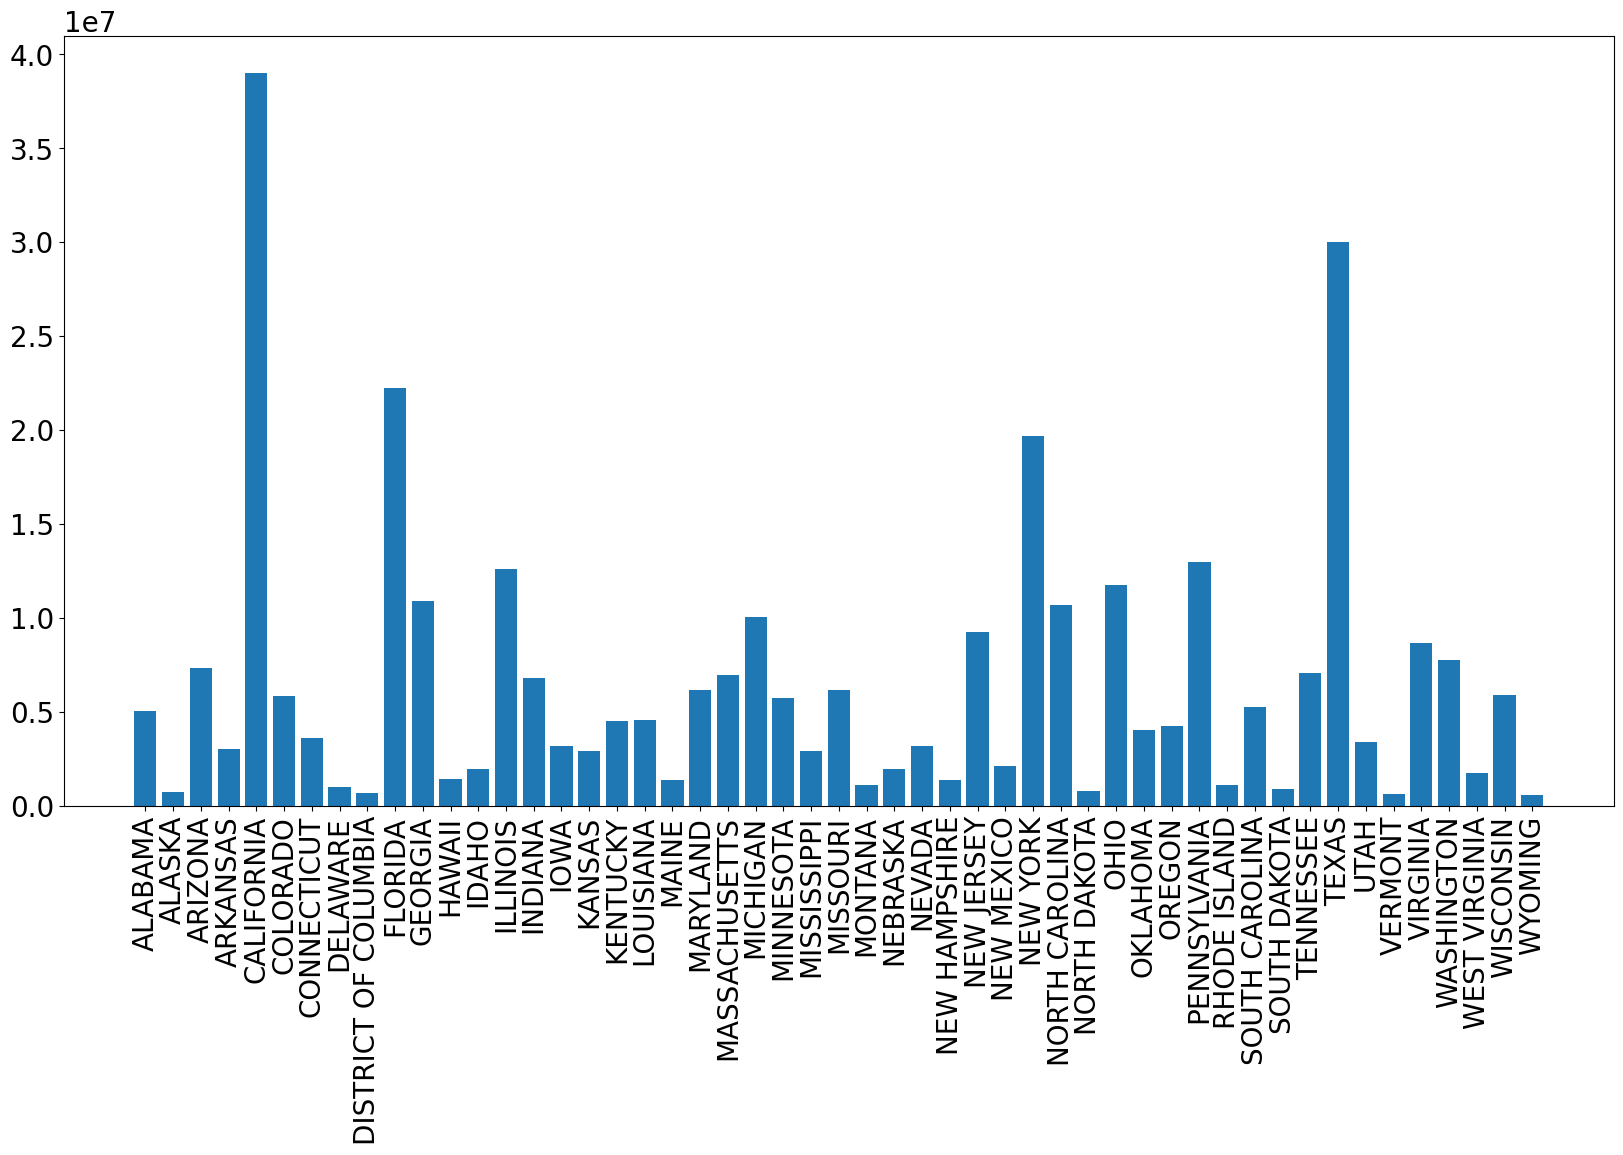

In [78]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(population_ds['STATE'],
        population_ds['POPULATION'])

<BarContainer object of 56 artists>

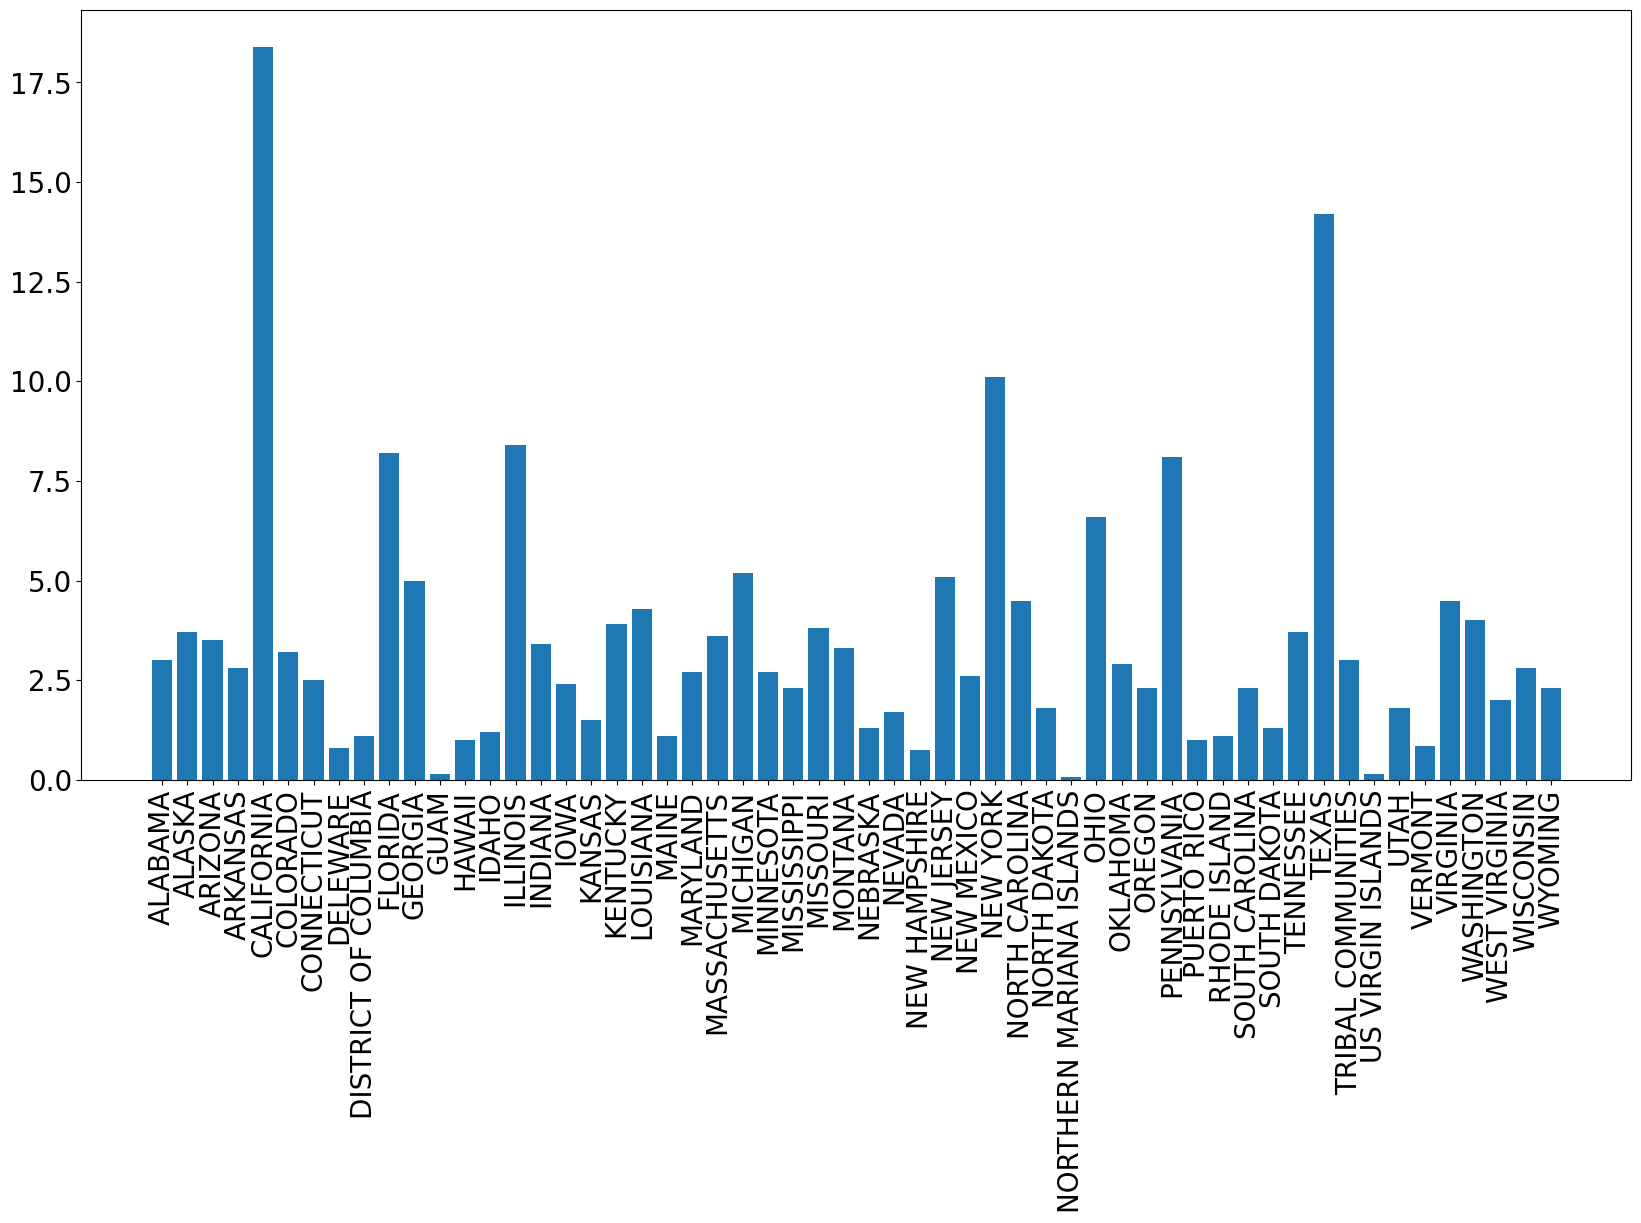

In [79]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(funding_ds['STATE'],
        funding_ds['FUNDING'])

In [80]:
funding_ds.head()

,STATE,FUNDING
0,ALABAMA,3.0
1,ALASKA,3.7
2,ARIZONA,3.5
3,ARKANSAS,2.8
4,CALIFORNIA,18.4


In [81]:
comp = pd.merge(funding_ds, population_ds, how="outer", on=["STATE"], copy=True)
comp = comp.dropna()
comp = comp.astype({'POPULATION' : 'int'})
comp.head()

,STATE,FUNDING,POPULATION
0,ALABAMA,3.0,5074296
1,ALASKA,3.7,733583
2,ARIZONA,3.5,7359197
3,ARKANSAS,2.8,3045637
4,CALIFORNIA,18.4,39029342


In [82]:
state_funding_percapita = pd.merge(comp, election2020_ds, how="outer", on=["STATE"], copy=True)
state_funding_percapita = state_funding_percapita.dropna()
state_funding_percapita = state_funding_percapita.astype({'POPULATION' : 'int'})
state_funding_percapita = state_funding_percapita.drop(columns=["BIDEN", "TRUMP"])
state_funding_percapita.dtypes

STATE         string[python]
FUNDING              float64
POPULATION             int64
BIDEN_WON     string[python]
COLOR         string[python]
dtype: object

In [83]:
state_funding_percapita['PER_CAPITA_FUNDING'] = state_funding_percapita.apply(lambda row: (row.FUNDING * 1000000000) / row.POPULATION, axis=1)
state_funding_percapita.head(n=10)

,STATE,FUNDING,POPULATION,BIDEN_WON,COLOR,PER_CAPITA_FUNDING
0,ALABAMA,3.0,5074296,NO,red,591.215018
1,ALASKA,3.7,733583,NO,red,5043.737382
2,ARIZONA,3.5,7359197,YES,blue,475.595367
3,ARKANSAS,2.8,3045637,NO,red,919.347907
4,CALIFORNIA,18.4,39029342,YES,blue,471.440180
5,COLORADO,3.2,5839926,YES,blue,547.952149
6,CONNECTICUT,2.5,3626205,YES,blue,689.425998
7,DISTRICT OF COLUMBIA,1.1,671803,YES,blue,1637.384769
8,FLORIDA,8.2,22244823,NO,red,368.625095
9,GEORGIA,5.0,10912876,YES,blue,458.174362


In [84]:
from pathlib import Path  
filepath = Path('/Users/jawaidhakim/Downloads/CUNY/DATA608/Story 1/final_state_funding_percapita.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
state_funding_percapita.to_csv(filepath, index=False)  

<BarContainer object of 49 artists>

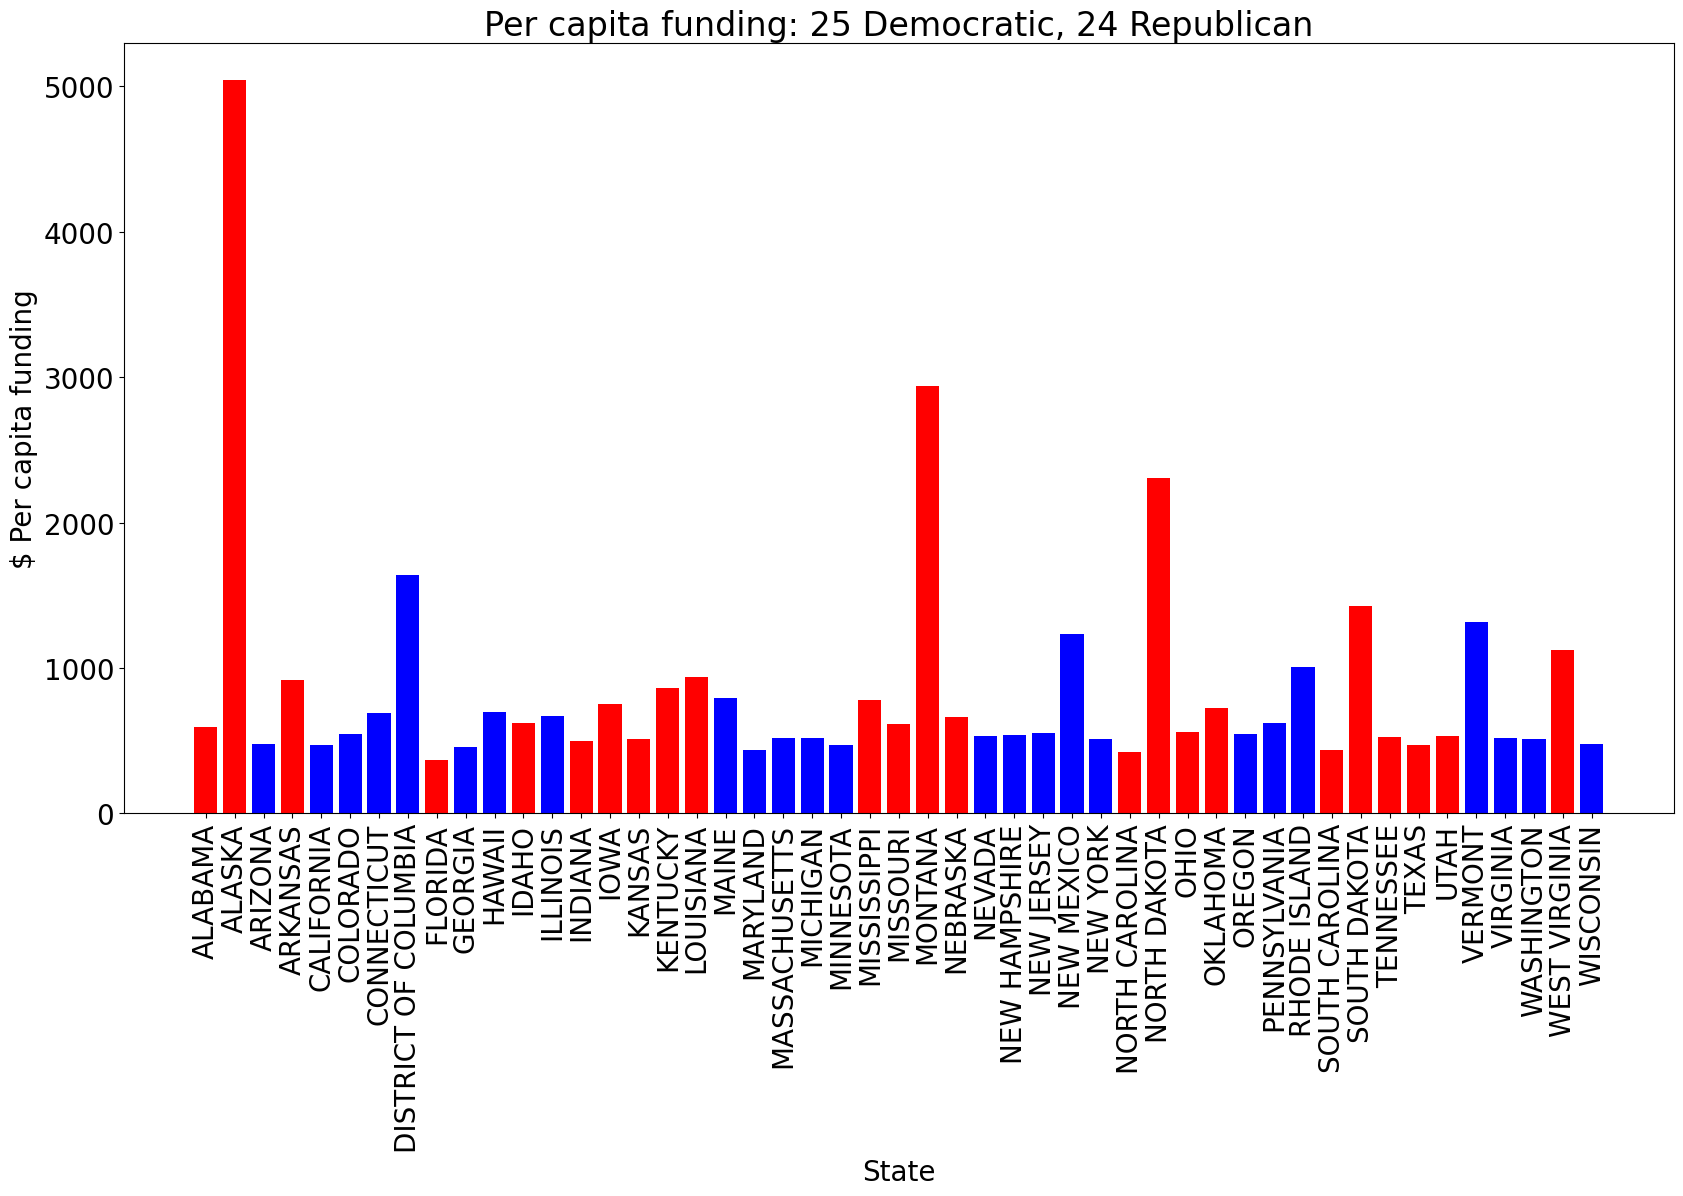

In [85]:
dems = len(state_funding_percapita[state_funding_percapita['BIDEN_WON'] == 'YES'])
reps = len(state_funding_percapita) - dems

plt.title(f'Per capita funding: {dems} Democratic, {reps} Republican')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.xlabel('State')
plt.ylabel('$ Per capita funding')
plt.bar(state_funding_percapita['STATE'],
        state_funding_percapita['PER_CAPITA_FUNDING'],
        color = state_funding_percapita['COLOR'])


<BarContainer object of 30 artists>

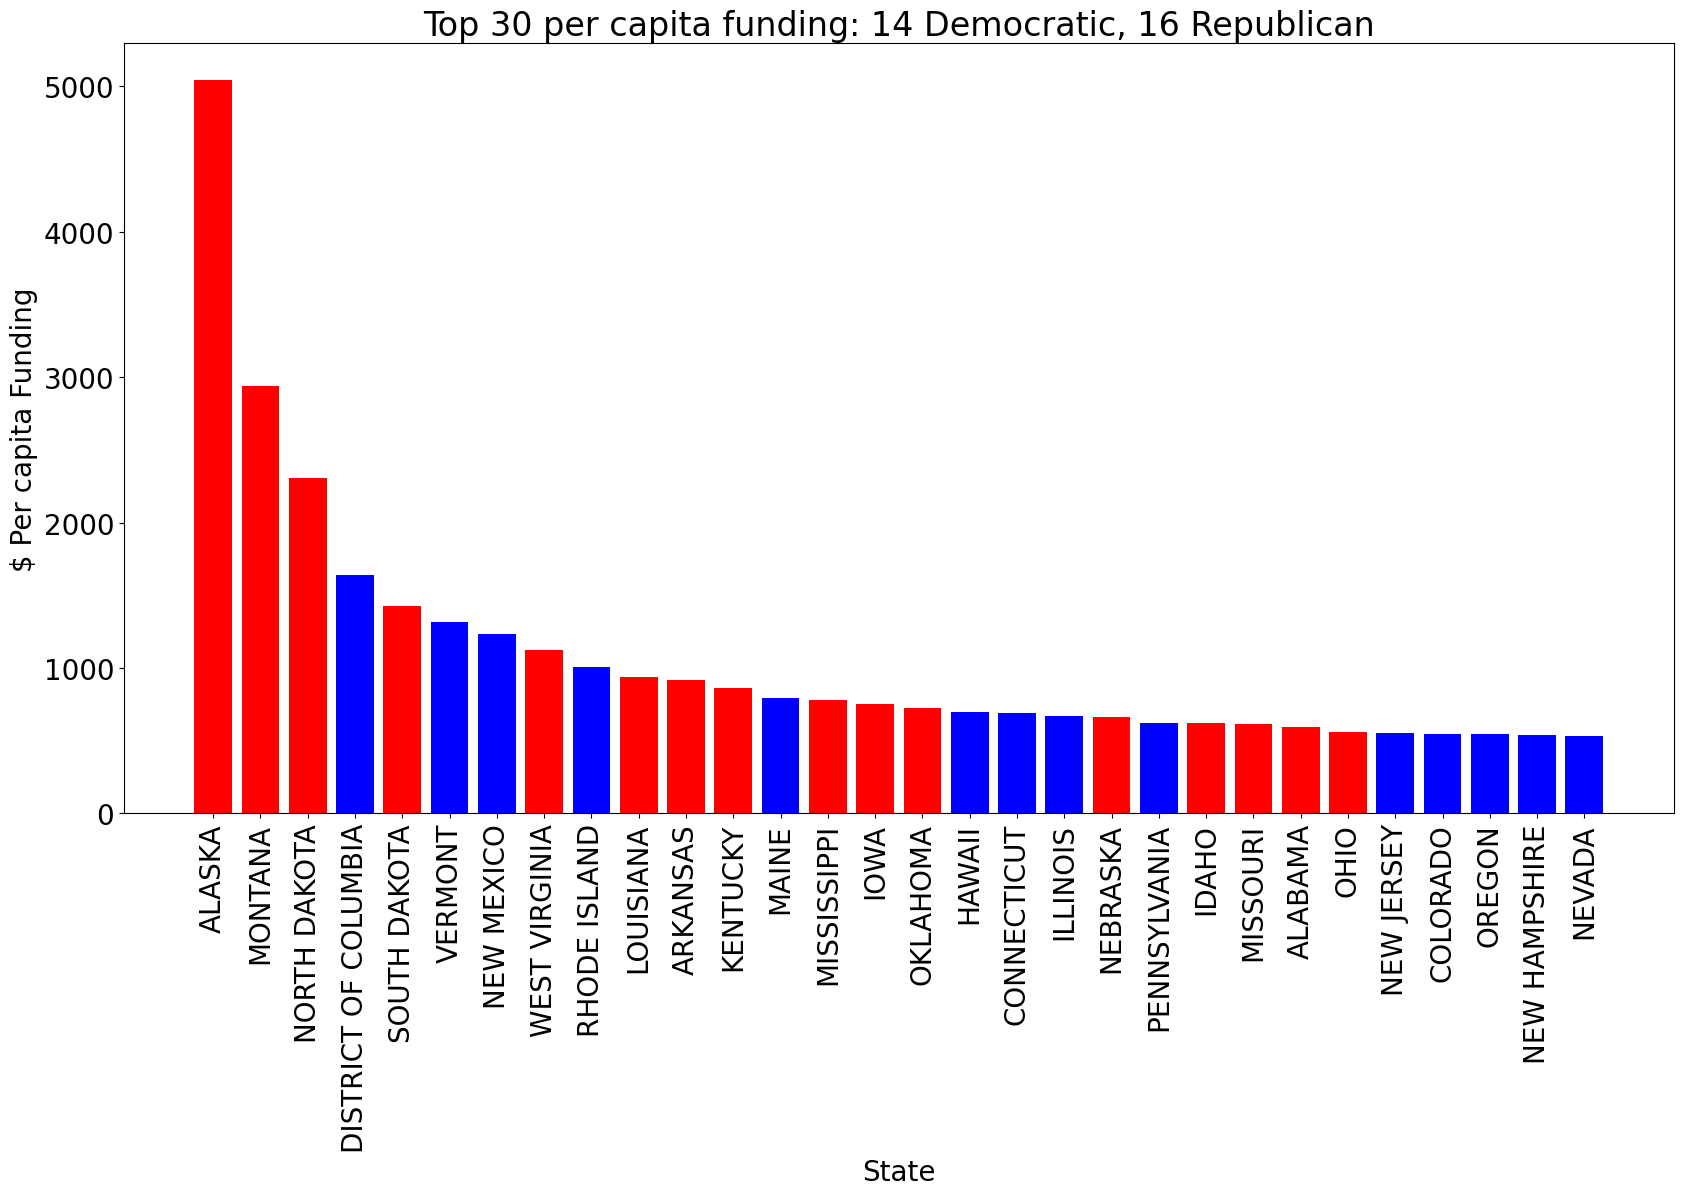

In [86]:
top_n = 30
n_largest = state_funding_percapita.nlargest(top_n, 'PER_CAPITA_FUNDING')
dems = len(n_largest[n_largest['BIDEN_WON'] == 'YES'])
reps = len(n_largest) - dems

plt.title(f'Top {top_n} per capita funding: {dems} Democratic, {reps} Republican')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.xlabel('State')
plt.ylabel('$ Per capita Funding')

plt.bar(n_largest['STATE'],
        n_largest['PER_CAPITA_FUNDING'],
        color = n_largest['COLOR'],
        label=['Republican' if s == 'NO' else 'Democratic' for s in n_largest['BIDEN_WON']])
